In [1]:
import sys
import pandas
import csv
import numpy as np
import pylab as pl
from scipy.stats import linregress
from scipy import stats  as S
%matplotlib inline

sys.path.append("/Users/maithoma/work/python/")
from tm_python_lib import * 
from fitting_tools import *

sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")


try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

In [2]:
import fitting_tools
from fitting_tools import *
reload(fitting_tools)

<module 'fitting_tools' from '/Users/maithoma/work/python/fitting_tools.pyc'>

In [7]:
dir = "/Users/maithoma/github/bayesLearn/scripts/"
dfSimple = pandas.DataFrame.from_csv(dir + "Data/simple_distances.csv")
dfComplex = pandas.DataFrame.from_csv(dir + "Data/complex_distances.csv")


def prepare(df):
    df = df.transpose()
    df.index = np.array(map(int,df.index))
    return df

dfSimple = prepare(dfSimple)
dfComplex = prepare(dfComplex)

In [8]:
# find first and last values:
FV = findFirstLastValue(df)
o = np.argsort(FV['v0'])
x = FV['v0'][o]
y = FV['vF'][o]

print "count improvements %s/%s"%(str(len(np.argwhere(x>y))),len(x))

NameError: name 'df' is not defined

In [62]:
# Find Waiting Times vs. Improvement:

def wTimeVsImprove(df):
    
    iDiff = []
    vDiff = []
    v = []
    
    for i in range(len(df)):
        index = np.argwhere(np.invert(np.isnan(df.iloc[i])))
        idiff = np.diff(index.flatten())
        vdiff = np.diff(np.array(df.iloc[i].values[index]).flatten())
        vAbsolute = np.array(df.iloc[i].values[index]).flatten()[:-1]
        c = vdiff != 0
        
        iDiff = np.append(iDiff,idiff[c])
        vDiff = np.append(vDiff,vdiff[c])
        v = np.append(v,vAbsolute[c])
        
    return {'iDiff' : iDiff, 'vDiff' : vDiff,'vAbsolute':v}

1.57027892992 0.282842712475 50
1.33288073769 0.288675134595 48


(0.05, 10.0)

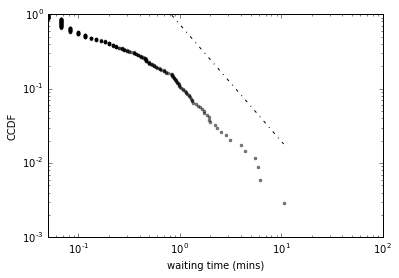

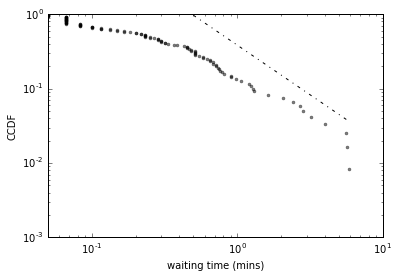

In [66]:
pl.figure(1)
dic = wTimeVsImprove(dfSimple)
x,y = rankorder(dic['iDiff']/60.)
c = x > 1/60.
#pl.loglog(x[c],y[c],'o')
#print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
fitdic = plotPowerLawFit(x[c],xmin=50/60.,continuousFit=True,addnoise=True,confint=.01,plot=True)
pl.xlabel("waiting time (mins)")
pl.ylabel("CCDF")
pl.xlim(xmin=3/60.)

pl.figure(2)
dic = wTimeVsImprove(dfComplex)
x,y = rankorder(dic['iDiff']/60.)
c = x > 1/60.
#pl.loglog(x[c],y[c],'o')
#print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
fitdic = plotPowerLawFit(x[c],xmin=50/100.,continuousFit=True,addnoise=True,confint=.01,plot=True)
pl.xlabel("waiting time (mins)")
pl.ylabel("CCDF")
pl.xlim(xmin=3/60.)


LinregressResult(slope=-0.062908239105299996, intercept=0.097776676942150365, rvalue=-0.21286335844436247, pvalue=0.28641912475937986, stderr=0.05775207824519861)
SpearmanrResult(correlation=-0.084260634331574241, pvalue=0.44325554526083522)


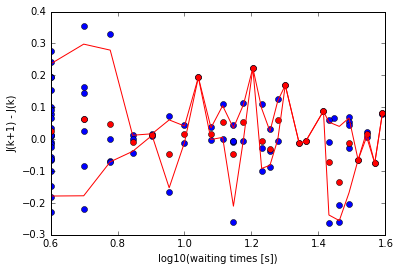

In [88]:
x = dic['iDiff']
y = dic['vDiff']
lx = np.log10(x)

c = (x > 3)*(y != 0)*(x < 40)


B = binning(lx[c],y[c],60,confinter=5)

pl.plot(lx[c],y[c],'o')
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(B['bins'],B['mean'])
print fit
print S.spearmanr(lx[c],y[c])
pl.xlabel("log10(waiting times [s])")
pl.ylabel("J(k+1) - J(k)")
#pl.xlim(xmax=50)

In [69]:
x = dic['iDiff']
y = dic['vDiff']
z = dic['vAbsolute']

print len(x),len(y),len(z)

6777 6777 6777


LinregressResult(slope=-0.044863302673391565, intercept=0.02472996949109614, rvalue=-0.67128808725403588, pvalue=3.28886650882669e-07, stderr=0.0074677426605578891)


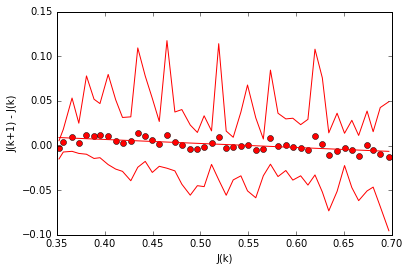

In [80]:
c = (z > 0.35)*(z < 0.70)
B = binning(z[c],y[c],60,confinter=5)
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(B['bins'],B['mean'])
print fit
#pl.plot(z,y,'o')
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'r-')
pl.ylabel("J(k+1) - J(k)")
pl.xlabel("J(k)")

LinregressResult(slope=-0.0011490478805942911, intercept=0.66613154086935822, rvalue=-0.53399453903253113, pvalue=0.0049571301094702277, stderr=0.00037136682040787324)


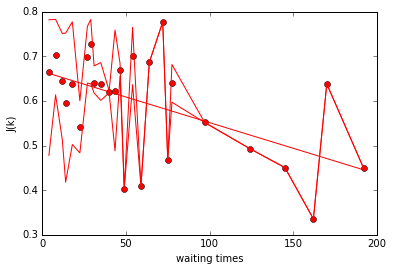

In [87]:
c = (x > 1)*(x < 200)
lx = np.log10(x[c])
B = binning(x[c],z[c],60,confinter=5)
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(B['bins'],B['mean'])
print fit
#pl.plot(z,y,'o')
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'r-')
pl.ylabel("J(k)")
pl.xlabel("waiting times")
#pl.ylabel("J(k+1) - J(k)")
